/tmp/ipython-input-3221341600.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df.replace({'x':1, 'o':-1, 'b':0})


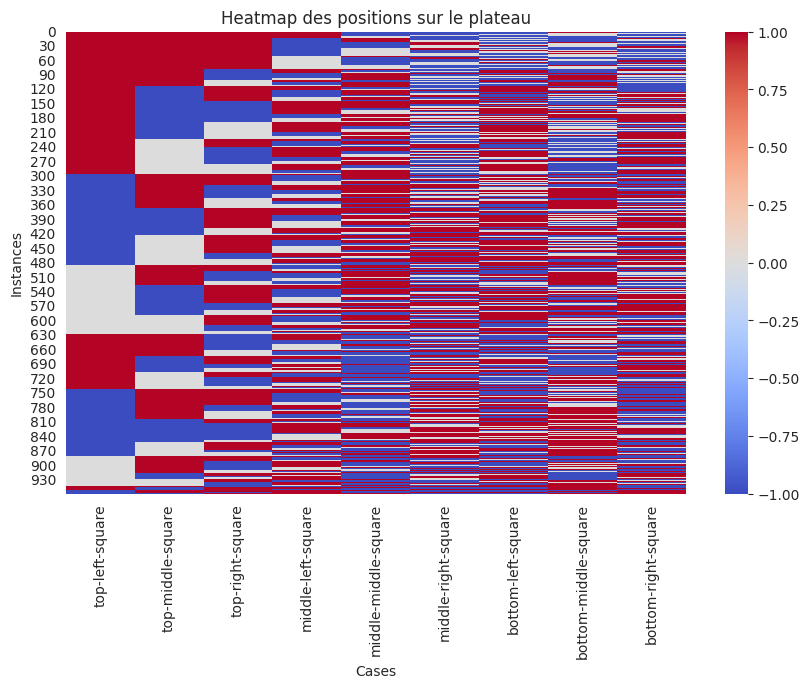

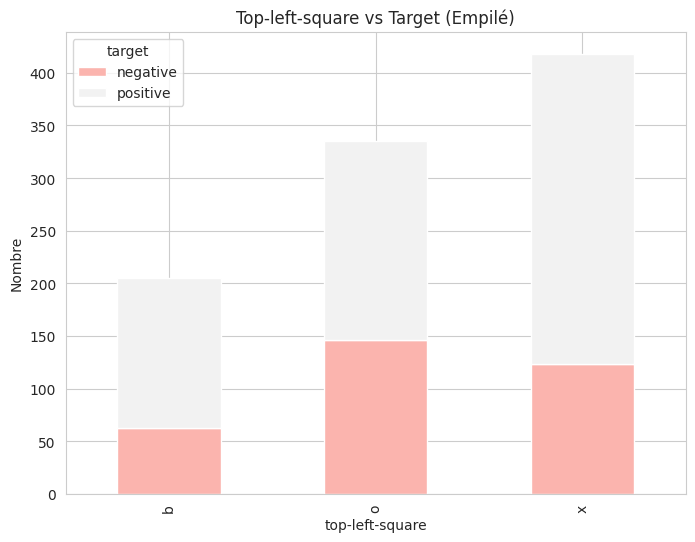

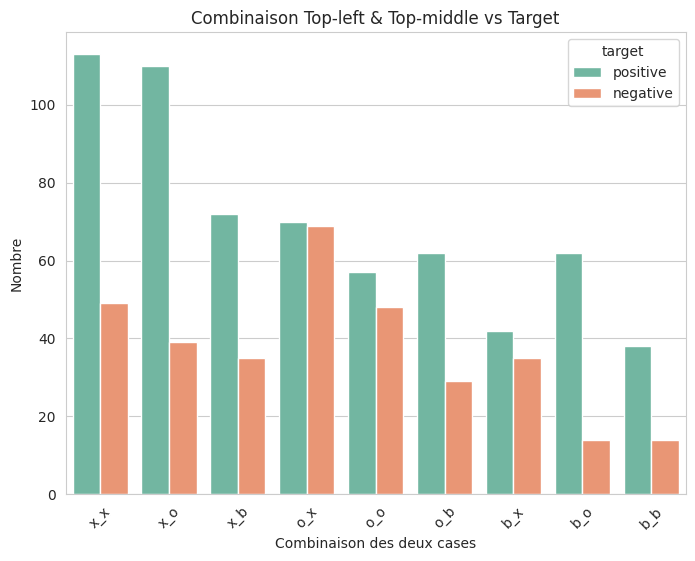

In [3]:
# Installer la librairie si nécessaire
!pip install ucimlrepo

# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# -----------------------------
# 1. Charger le dataset
# -----------------------------
tic_tac_toe_endgame = fetch_ucirepo(id=101)
X = tic_tac_toe_endgame.data.features
y = tic_tac_toe_endgame.data.targets

df = pd.concat([X, y], axis=1)
df.rename(columns={df.columns[-1]: 'target'}, inplace=True)

# -----------------------------
# 2. Graphique 1 : Heatmap des fréquences par case
# -----------------------------
# Encoder les valeurs pour visualisation
df_encoded = df.replace({'x':1, 'o':-1, 'b':0})

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded[X.columns].astype(int), cmap='coolwarm', cbar=True)
plt.title("Heatmap des positions sur le plateau")
plt.xlabel("Cases")
plt.ylabel("Instances")
plt.show()

# -----------------------------
# 3. Graphique 2 : Diagramme en barres empilées pour la variable cible
# -----------------------------
cross_tab = pd.crosstab(df['top-left-square'], df['target'])
cross_tab.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(8,6))
plt.title("Top-left-square vs Target (Empilé)")
plt.ylabel("Nombre")
plt.show()

# -----------------------------
# 4. Graphique 3 : Countplot des combinaisons de 2 cases
# -----------------------------
plt.figure(figsize=(8,6))
sns.countplot(x=df['top-left-square'] + "_" + df['top-middle-square'], hue=df['target'], palette='Set2')
plt.title("Combinaison Top-left & Top-middle vs Target")
plt.xlabel("Combinaison des deux cases")
plt.ylabel("Nombre")
plt.xticks(rotation=45)
plt.show()
